# convolutional neural networks, guided lesson

## 0. introduction

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery:

* they are also known as shift invariant or space invariant artificial neural networks (SIANN)
* based on their shared-weights architecture and translation invariance characteristics. 
* They have applications in:
    * image and video recognition 
    * recommender systems
    * image classification
    * medical image analysis
    * natural language processing
    * and financial time series.

You need to install: `opencv-python`, `tensorflow`, `keras`, and its requirements... take into account that `opencv` is hard to make it work properly, even for experienced developers...

## 1. convolution operation

this is a convolution:

![convolution](https://miro.medium.com/max/1920/1*D6iRfzDkz-sEzyjYoVZ73w.gif "convolution operation")

cnn features:

![convolution](https://www.pnas.org/content/pnas/116/4/1074/F2.large.jpg?width=800&height=600&carousel=1 "cnn features")

## 2. mnist example with convolutional neural network and keras

### 2.1 settings

In [1]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 12

IMG_ROWS, IMG_COLS = 28, 28

### 2.2 data loading

keras includes some dataset to play with...

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


let's visualize some training examples...

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

values for an image range from intensity 0 (min) to 255 (max)...

In [5]:
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

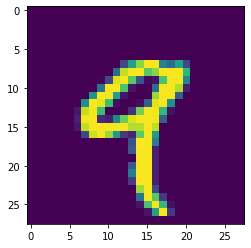

In [6]:
plt.imshow(x_train[4]);

In [7]:
y_train[4]

9

### 2.3 data preprocessing

now, let's reshape data to take into account channels, even if images are gray scale... this depend on chosen backend for Keras, commonly Tensorflow, which is `channel last` ...

In [8]:
import keras.backend as K

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_test = x_test.reshape(x_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
else:
    x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, 1)
    x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

let's scale image to have values between 0 and 1...

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

finally, we have a dataset ready to train and test...

In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
from keras.utils import to_categorical

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_train.shape

(60000, 10)

### 2.4 modeling

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [16]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

let's train the model...

In [18]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 274us/step - loss: 0.2639 - accuracy: 0.9177 - val_loss: 0.0569 - val_accuracy: 0.9821
Epoch 2/12
60000/60000 [==============================] - 14s 230us/step - loss: 0.0897 - accuracy: 0.9732 - val_loss: 0.0374 - val_accuracy: 0.9875
Epoch 3/12
60000/60000 [==============================] - 14s 233us/step - loss: 0.0643 - accuracy: 0.9804 - val_loss: 0.0354 - val_accuracy: 0.9885
Epoch 4/12
60000/60000 [==============================] - 14s 235us/step - loss: 0.0538 - accuracy: 0.9840 - val_loss: 0.0310 - val_accuracy: 0.9894
Epoch 5/12
60000/60000 [==============================] - 14s 235us/step - loss: 0.0475 - accuracy: 0.9861 - val_loss: 0.0287 - val_accuracy: 0.9901
Epoch 6/12
60000/60000 [==============================] - 14s 233us/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 7/12
60000/60000 [==============================] 

### 2.5 model performance

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025446641624959195
Test accuracy: 0.9922999739646912


## 3. fully connected neural network

In [48]:
model = Sequential()

model.add(Flatten(input_shape=INPUT_SHAPE))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)              

In [50]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [51]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 35us/step - loss: 1.8727 - accuracy: 0.3406 - val_loss: 1.1472 - val_accuracy: 0.6291
Epoch 2/12
60000/60000 [==============================] - 2s 29us/step - loss: 1.2724 - accuracy: 0.5376 - val_loss: 0.9002 - val_accuracy: 0.6869
Epoch 3/12
60000/60000 [==============================] - 2s 29us/step - loss: 1.0827 - accuracy: 0.6094 - val_loss: 0.8196 - val_accuracy: 0.7311
Epoch 4/12
60000/60000 [==============================] - 2s 29us/step - loss: 0.9990 - accuracy: 0.6447 - val_loss: 0.7896 - val_accuracy: 0.7590
Epoch 5/12
60000/60000 [==============================] - 2s 29us/step - loss: 0.9475 - accuracy: 0.6768 - val_loss: 0.7045 - val_accuracy: 0.7990
Epoch 6/12
60000/60000 [==============================] - 2s 29us/step - loss: 0.8971 - accuracy: 0.7047 - val_loss: 0.6777 - val_accuracy: 0.8181
Epoch 7/12
60000/60000 [==============================] - 2s 29us/st